In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
# read the dataset
cdf = pd.read_csv("Cricket.csv", sep=",",encoding="ISO-8859-1", header=0)
cdf.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [12]:
df=cdf[['SR','Ave']]
df.shape

(79, 2)

In [10]:
df.head(10)

,SR,Ave
0,86.23,44.83
1,78.86,41.98
2,80.39,42.03
3,91.20,32.36
4,78.96,33.37
5,74.24,39.52
6,72.89,44.36
7,73.70,41.02
8,71.24,39.16
9,79.51,40.48


In [11]:
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(79, 2)

In [14]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['SR', 'Ave']
df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [15]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [17]:
cdf['cluster_id'] = kmeans.labels_
cdf.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


In [19]:
cdf[cdf['Player']=='V Kohli (INDIA)']

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3


In [20]:
cdf[cdf['cluster_id']==3]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,3
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,3
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,3
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,3
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,3
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,3
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3,3


<AxesSubplot:xlabel='cluster_id', ylabel='SR'>

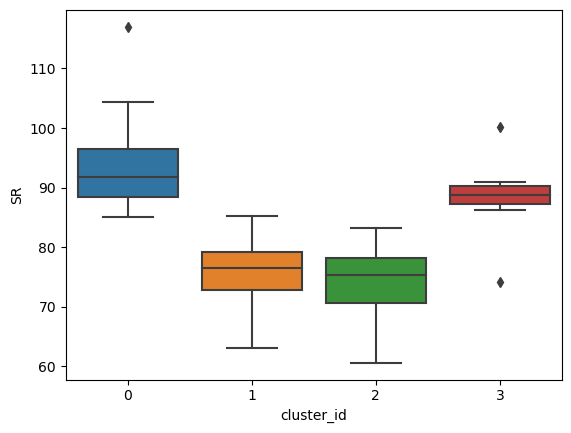

In [23]:
sns.boxplot(x='cluster_id', y='SR', data=cdf)

<AxesSubplot:xlabel='cluster_id', ylabel='Ave'>

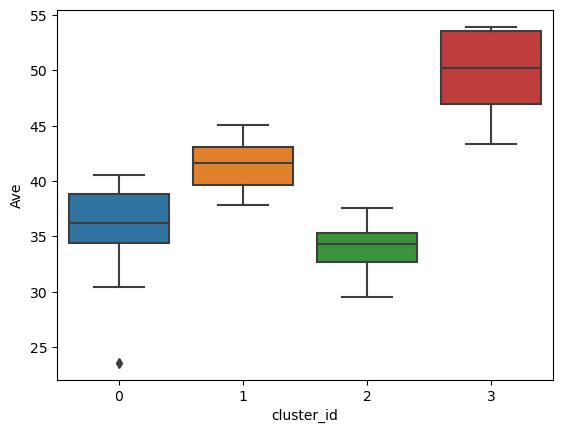

In [24]:
sns.boxplot(x='cluster_id', y='Ave', data=cdf)

In [25]:
# (high SR, high Ave) - A=3, (low SR, low Ave) - B=2, (High SR, Low Ave) - C=0, (Low SR, High Ave) - D=1

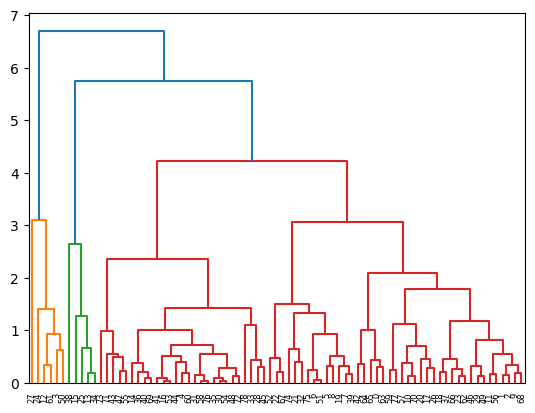

In [26]:
# complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [27]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [28]:
# assign cluster labels
cdf['cluster_labels'] = cluster_labels
cdf.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,2


In [32]:
cdf[cdf['cluster_labels']==0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1,0
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,1,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,1,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,1,0
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11,0,0
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,1,0


In [33]:
cdf[cdf['cluster_labels']==1]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,cluster_labels
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,1
12,AC Gilchrist (AUS/ICC),1996-2008,287,279,11,9619,172,35.89,9922,96.94,16,55,19,0,1
24,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,7929,104.33,15,38,14,0,1
27,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,6892,117.00,6,39,30,0,1
50,BB McCullum (NZ),2002-2016,260,228,28,6083,166,30.41,6312,96.37,5,32,20,0,1
61,SK Raina (INDIA),2005-2015,223,192,35,5568,116*,35.46,5938,93.76,5,36,14,0,1


In [34]:
cdf[cdf['cluster_labels']==2]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,cluster_labels
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,2
14,M Azharuddin (INDIA),1985-2000,334,308,54,9378,153*,36.92,12669,74.02,7,58,9,2,2
16,PA de Silva (SL),1984-2003,308,296,30,9284,145,34.90,11443,81.13,11,64,17,2,2
28,SP Fleming (ICC/NZ),1994-2007,280,269,21,8037,134*,32.40,11242,71.49,8,49,17,2,2
30,SR Waugh (AUS),1986-2002,325,288,58,7569,120*,32.90,9971,75.91,3,45,15,2,2
31,A Ranatunga (SL),1982-1999,269,255,47,7456,131*,35.84,9571,77.90,4,49,18,2,2
33,Younis Khan (PAK),2000-2015,265,255,23,7249,144,31.24,9628,75.29,7,48,22,2,2
35,Saleem Malik (PAK),1982-1999,283,256,38,7170,102,32.88,9383,76.41,5,47,19,2,2
36,NJ Astle (NZ),1995-2007,223,217,14,7090,145*,34.92,9760,72.64,16,41,19,2,2
40,A Flower (ZIM),1992-2003,213,208,16,6786,145,35.34,9097,74.59,4,55,13,2,2


In [35]:
cdf[cdf['cluster_labels']==3]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,cluster_labels
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,3,3
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,3,3
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3,3
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,3,3
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,3,3
